In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting the default seaborn theme
sns.set_theme(style='darkgrid')

# Visualizing Composition or, Proportions that are independent of time

Displaying individual **parts of a whole** enables **comparisons among subcategories** by evaluating relative proportions, for example, market share by companies for a particular product or service. 

**Note:** The data can be time dependent or independent. But, here we will discuss only about the charts used for visualizing time independent data.

- **Questions:**
1. What are the parts that make up the whole?
2. What part is the largest or smallest?
3. What parts are similar or dissimilar?

- **Insight:** use to show summaries, similarities, anomalies, percentage related to the whole (by category, subcategory, and over time).

- **Data:** single categorical variable with subcategories, two or more variables.

- **Chart options:** pie, stacked bar, stacked 100% bar, tree map, and doughnut chart.

## **Pie Charts**

Pie charts show proportions within a whole. **The slices are subcategories of a single category**. Slices add up to 100% or 1.

##### --> 
When to use Pie Charts

- **Usually, a Pie chart is never the answer.**
- A pie chart typically represents numbers in percentages, used to visualize a part to whole relationship or a composition. Pie charts are **not meant to compare individual sections to each other or to represent exact values** (you should use a bar chart for that).

##### --> 
When to avoid Pie Charts

- Avoid using pie charts if all the slices are similar in size.
- When possible, avoid pie charts and donuts. The human mind thinks linearly but, when it comes to angles and areas, most of us can’t judge them well.

##### --> 
Best practices for Pie charts

- Limit pie charts to six slices or less.
- Label directly on the pie slices, rather than using a legend.
- Make sure that the total sum of all segments equals 100 percent.
- Don’t use 3D or blow apart effects — they reduce comprehension and show incorrect proportions.

##### --> 

Seaborn doesn't have any default function to draw pie charts. But we can use `matplotlib.pyplot.pie(x, labels, colors, autopct, pctdistance=0.6, labeldistance=1.1)` to draw pie charts. Seaborn color palettes can be passed to the colors argument.

- The detailed documentation of the functionality can be found at, https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html.

- <b> <u> Important Parameters: </u> </b>

    - `x (1D array-like):` The wedge sizes.
    - `labels (list):` A sequence of strings providing the labels for each wedge
    - `colors:` A sequence of colors through which the pie chart will cycle. Accepts Seaborn color palettes.
    - `autopct:` If not None, autopct is a string or function used to label the wedges with their numeric value.
    - `pctdistance:` The relative distance along the radius at which the the text generated by autopct is drawn. To draw the text outside the pie, set pctdistance > 1.
    - `labeldistance:` The relative distance along the radius at which the labels are drawn. To draw the labels inside the pie, set labeldistance < 1.

In [3]:
# loading example dataset
df_tips = sns.load_dataset('tips')
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [23]:
# to see what percentage of the total tips were given by smokers and how much by non-smokers,
x = (df_tips.groupby('smoker').tip.agg('sum')/df_tips.tip.agg('sum'))*100
color_palette = sns.color_palette("pastel")

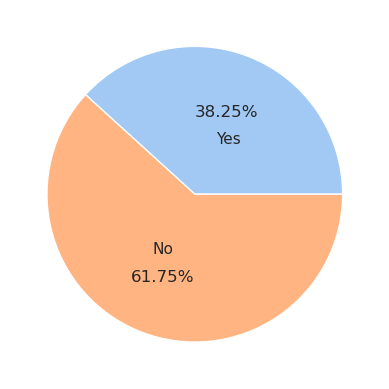

In [24]:
plt.pie(x, labels=x.index, colors=color_palette, autopct="%.2f%%", labeldistance=0.4)
plt.show()

## **Stacked and 100% Stacked Bar Charts**

**---------- to be changed ----------------**

Pie charts show proportions within a whole. **The slices are subcategories of a single category**. Slices add up to 100% or 1.

##### --> 
When to use Pie Charts

- **Usually, a Pie chart is never the answer.**
- A pie chart typically represents numbers in percentages, used to visualize a part to whole relationship or a composition. Pie charts are **not meant to compare individual sections to each other or to represent exact values** (you should use a bar chart for that).

##### --> 
When to avoid Pie Charts

- Avoid using pie charts if all the slices are similar in size.
- When possible, avoid pie charts and donuts. The human mind thinks linearly but, when it comes to angles and areas, most of us can’t judge them well.

##### --> 
Best practices for Pie charts

- Limit pie charts to six slices or less.
- Label directly on the pie slices, rather than using a legend.
- Make sure that the total sum of all segments equals 100 percent.
- Don’t use 3D or blow apart effects — they reduce comprehension and show incorrect proportions.

##### --> 

Seaborn doesn't have any default function to draw pie charts. But we can use `matplotlib.pyplot.pie(x, labels, colors, autopct, pctdistance=0.6, labeldistance=1.1)` to draw pie charts. Seaborn color palettes can be passed to the colors argument.

- The detailed documentation of the functionality can be found at, https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html.

- <b> <u> Important Parameters: </u> </b>

    - `x (1D array-like):` The wedge sizes.
    - `labels (list):` A sequence of strings providing the labels for each wedge
    - `colors:` A sequence of colors through which the pie chart will cycle. Accepts Seaborn color palettes.
    - `autopct:` If not None, autopct is a string or function used to label the wedges with their numeric value.
    - `pctdistance:` The relative distance along the radius at which the the text generated by autopct is drawn. To draw the text outside the pie, set pctdistance > 1.
    - `labeldistance:` The relative distance along the radius at which the labels are drawn. To draw the labels inside the pie, set labeldistance < 1.